## Criando dataframe do exemplo da aula

In [59]:
import pandas as pd
import numpy as np

In [60]:


data = [['Jessica', 'Oceans Eleven', 2],
        ['Jessica', 'The Lion King', 4],
        ['Jessica', 'Braveheart', 3],
        ['Jessica', 'Independence Day', 2],
        ['Jessica', 'Deby&Loide', 3],
        ['Marta', 'The Princess Diary', 4],
        ['Marta', 'Oceans Eleven', 3],
        ['Marta', 'Braveheart', 4],
        ['Marta', 'Independence Day', 3],
        ['Marta', 'Deby&Loide', 2],
        ['Jose', 'The Princess Diary', 1],
        ['Jose', 'Oceans Eleven', 5],
        ['Jose', 'The Lion King', 3],
        ['Jose', 'Braveheart', 4],
        ['Jose', 'Deby&Loide', 5],
        ['Dave', 'The Princess Diary', 1],
        ['Dave', 'The Lion King', 2],
        ['Dave', 'Braveheart', 3],
        ['Dave', 'Independence Day', 4]]

genres = [['The Princess Diary', 'Drama|Comedia'],
          ['Oceans Eleven', 'Acao|Comedia'],
          ['The Lion King', 'Drama|Sci-Fi'],
          ['Braveheart', 'Drama|Acao'],
          ['Independence Day', 'Acao|Sci-Fi'],
          ['Deby&Loide', 'Comedia']]

df = pd.DataFrame(data, columns=['user','item', 'rating'])
movies = pd.DataFrame(genres, columns=['item','genres'])
df

,user,item,rating
0,Jessica,Oceans Eleven,2
1,Jessica,The Lion King,4
2,Jessica,Braveheart,3
3,Jessica,Independence Day,2
4,Jessica,Deby&Loide,3
5,Marta,The Princess Diary,4
6,Marta,Oceans Eleven,3
7,Marta,Braveheart,4
8,Marta,Independence Day,3
9,Marta,Deby&Loide,2


In [95]:
movies

,movieId,title,genres
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,61,Dangerous Minds (1995),Drama
2,125,Across the Sea of Time (1995),Documentary|IMAX
3,23,Crimson Tide (1995),Drama|Thriller|War
4,56,Showgirls (1995),Drama
...,...,...,...
427,358,New Scenes from America (2002),Documentary
428,246,Bright Days Ahead (2013),Drama|Romance
430,391,A Rumor Of War (1980),(no genres listed)
431,394,Berserk: The Golden Age Arc 3 - Descent (2013),Action|Animation|Fantasy


## Mapeando usuários e itens para ids

In [62]:
map_users = {user: idx for idx, user in enumerate(df.user.unique())}
map_items = {item: idx for idx, item in enumerate(df.item.unique())}
df['userId'] = df['user'].map(map_users)
df['itemId'] = df['item'].map(map_items)
df

,user,item,rating,userId,itemId
0,Jessica,Oceans Eleven,2,0,0
1,Jessica,The Lion King,4,0,1
2,Jessica,Braveheart,3,0,2
3,Jessica,Independence Day,2,0,3
4,Jessica,Deby&Loide,3,0,4
5,Marta,The Princess Diary,4,1,5
6,Marta,Oceans Eleven,3,1,0
7,Marta,Braveheart,4,1,2
8,Marta,Independence Day,3,1,3
9,Marta,Deby&Loide,2,1,4


In [63]:
movies['itemId'] = movies['item'].map(map_items)
movies

,item,genres,itemId
0,The Princess Diary,Drama|Comedia,5
1,Oceans Eleven,Acao|Comedia,0
2,The Lion King,Drama|Sci-Fi,1
3,Braveheart,Drama|Acao,2
4,Independence Day,Acao|Sci-Fi,3
5,Deby&Loide,Comedia,4


In [64]:
movies_genres = movies.drop('genres', axis=1).join(movies.genres.str.split('|', expand=True)
             .stack().reset_index(drop=True, level=1).rename('genre'))
movies_genres

,item,itemId,genre
0,The Princess Diary,5,Drama
0,The Princess Diary,5,Comedia
1,Oceans Eleven,0,Acao
1,Oceans Eleven,0,Comedia
2,The Lion King,1,Drama
2,The Lion King,1,Sci-Fi
3,Braveheart,2,Drama
3,Braveheart,2,Acao
4,Independence Day,3,Acao
4,Independence Day,3,Sci-Fi


### Funções para obter informações específicas do DataFrame

In [65]:
# Obter a nota que um usuário deu para um item.
def get_rating(userId,itemId):
    if len(df[(df['userId']==userId)&(df['itemId']==itemId)]) == 0:
        return 0
    return (df.loc[(df.userId==userId) & (df.itemId == itemId),'rating'].iloc[0])

get_rating(1, 5)

4

In [66]:
# Obter a lista de todos os itens que um usuário avaliou.
def get_item_ids(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'itemId'].tolist())

get_item_ids(0)

[0, 1, 2, 3, 4]

In [67]:
# Obter o título do item dado o seu id.
def get_item_title(itemId):
    if itemId not in df['itemId'].values:
        return ''
    return (df.loc[(df.itemId == itemId),'item'].iloc[0])

get_item_title(0)

'Oceans Eleven'

In [68]:
# Obter a lista de ratings de um usuário.
def get_user_ratings(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'rating'].tolist())

get_user_ratings(0)

[2, 4, 3, 2, 3]

In [69]:
# Obter a lista de ratings de um usuário.
def get_item_ratings(itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'rating'].tolist())

get_item_ratings(0)

[2, 3, 5]

In [70]:
# Obter a média de ratings de um usuário
def get_user_mean(userId):
    return np.mean(get_user_ratings(userId))

get_user_mean(1)

3.2

In [71]:
# Obter a média de ratings de um item
def get_item_mean(itemId):
    return np.mean(get_item_ratings(itemId))

get_item_mean(1)

3.0

In [72]:
# Obter a lista de gêneros de um item
def get_genres(itemId):
    if itemId not in movies_genres['itemId'].values:
        return []
    return movies_genres.loc[(movies_genres.itemId==itemId),'genre'].tolist()

get_genres(0)

['Acao', 'Comedia']

### Computar a similaridade de itens usando Jaccard aplicado aos gêneros

In [73]:
from math import pow, sqrt

def similarity_score(itemId1, itemId2):
    '''
    itemId1 & itemId2 : ids dos dois itens cuja similaridade será computada
    '''
    # Obter os gêneros de cada item.
    genre_list1 = get_genres(itemId1)
    genre_list2 = get_genres(itemId2)
    common_genres = list(set(genre_list1) & set(genre_list2))
    if len(common_genres) == 0:
        return 0

    # Calcular Jaccard
    return len(common_genres) / len(set(genre_list1 + genre_list2))

similarity_score(4, 5)

0.5

### Obter os itens mais similares

In [74]:
def most_similar_items(itemId, k):
    '''
    itemId : Targeted item
    k : qtde de vizinhos
    '''
    # Obter lista de itens.
    item_ids = df.itemId.unique().tolist()

    # Obter a similaridade entre o item alvo e os demais itens
    sim = [(similarity_score(itemId, i), i) for i in item_ids if i != itemId]

    # Ordenação inversa.
    sim.sort()
    sim.reverse()

    # Retornando os usuários mais similares.
    return sim[:k]

print(most_similar_items(0, 2))

[(0.5, 4), (0.3333333333333333, 5)]


### Calcular a nota

In [75]:
def get_prediction(userId, itemId, k):
    item_mean = get_item_mean(itemId)
    similar_items = most_similar_items(itemId, k)
    num = []
    den = []

    for s, j in similar_items:
        rj = get_rating(userId, j)
        if rj == 0:
            continue
        num.append(s * (rj - get_item_mean(j)))
        den.append(s)

    return item_mean + sum(num) / sum(den)

get_prediction(3, 4, 2)

2.3333333333333335

## Aprendizado de Máquina

### Importar base de dados

In [78]:
!pip install wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz


Saved under ml-20m-compact.tar.gz
dataset/
dataset/tags_sample.csv
dataset/._.DS_Store
dataset/.DS_Store
dataset/movies_sample.csv
dataset/._genome-tags.csv
dataset/genome-tags.csv
dataset/._ml-youtube.csv
dataset/ml-youtube.csv
dataset/._genome-scores.csv
dataset/genome-scores.csv
dataset/ratings_sample.csv


In [79]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)

movies['movieId'] = movies['movieId'].map(map_items)
movies = movies.dropna(axis=0)
movies['movieId'] = movies['movieId'].astype(int)

map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

<ipython-input-79-ca1d5932ce06>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['movieId'] = movies['movieId'].astype(int)


In [80]:
movies.head()

,movieId,title,genres
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,61,Dangerous Minds (1995),Drama
2,125,Across the Sea of Time (1995),Documentary|IMAX
3,23,Crimson Tide (1995),Drama|Thriller|War
4,56,Showgirls (1995),Drama


In [82]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
movies_exp = movies.join(movies.genres.str.get_dummies().astype(bool))
movies_exp.drop('genres', inplace=True, axis=1)
movies_exp['Bias'] = True
movies_exp.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Bias
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,61,Dangerous Minds (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,125,Across the Sea of Time (1995),False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,23,Crimson Tide (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
4,56,Showgirls (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Treinamento do modelo

In [83]:
def train_linearcbf(train, features, n_features, lr=0.05, reg=0.02, miter=10):
    n_users = df['userId'].max()+1
    profiles = np.random.normal(0.0, 0.1, (n_users, n_features))

    error = []
    for t in range(miter):
        sq_error = 0
        for index, row in train.iterrows():
            u = row['userId']
            i = row['movieId']
            r_ui = row['rating']
            pred = np.dot(profiles[u], features[i])
            e_ui = pred - r_ui
            sq_error = sq_error + pow(e_ui, 2)
            for k in range(n_features):
                profiles[u][k] = profiles[u][k] - lr * (e_ui * features[i][k] + reg * profiles[u][k])

        error.append(sqrt(sq_error/len(train)))

    return profiles, error

In [84]:
features = movies_exp.iloc[:,2:].to_numpy(dtype=int)
n_movies, n_features = features.shape
profiles, error = train_linearcbf(train, features, n_features)

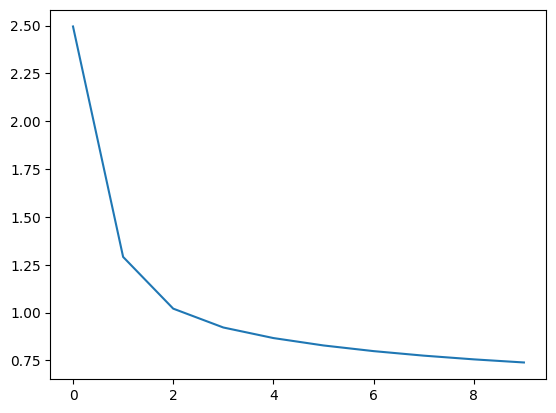

In [85]:
import matplotlib.pyplot as plt

plt.plot(error)
plt.show()

### Predição

In [86]:
test.head()

,userId,movieId,rating,title
31477,729,11,5.0,Masters of the Universe (1987)
148621,7294,61,3.0,Dangerous Minds (1995)
25190,7646,9,3.0,Bachelor Party (1984)
91518,991,25,2.5,Keeping the Faith (2000)
113446,394,33,3.5,North by Northwest (1959)


In [87]:
pred = np.dot(profiles[729], features[11])
pred

3.7439893615956574

In [88]:
features[11]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Usando a bilbioteca CaseRecommender com CBF

In [89]:
movies_genres = movies.drop('genres', axis=1).join(movies.genres.str.split('|', expand=True)
             .stack().reset_index(drop=True, level=1).rename('genre'))
movies_genres.dropna(inplace=True)
movies_genres['movieId'] = movies_genres.movieId.astype(int)
movies_genres.head()

,movieId,title,genre
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime
0,49,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
1,61,Dangerous Minds (1995),Drama
2,125,Across the Sea of Time (1995),Documentary
2,125,Across the Sea of Time (1995),IMAX


In [90]:
movies_genres[['movieId', 'genre']].to_csv('items_genres.dat', index=False, sep='\t', header=False)
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

In [98]:
# install caserec
import sys
!{sys.executable} -m pip install caserecommender

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 942.5 kB/s eta 0:00:00


In [99]:
from caserec.recommenders.rating_prediction.item_attribute_knn import ItemAttributeKNN

ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_genres.dat', as_similar_first=True).compute()

[Case Recommender: Rating Prediction > Item Attribute KNN Algorithm]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 12.220216 sec
>> metadata:: 417 items and 20 metadata (890 interactions) | sparsity:: 89.33%
prediction_time:: 1.033254 sec
Eval:: MAE: 0.73626 RMSE: 0.968056 
